In [116]:
import pickle

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [117]:
# Reading in data
input_file = '../data-gen/data.json'
dataset = pd.read_json(input_file)
df = pd.DataFrame(dataset)
# df

In [118]:
count_df = pd.DataFrame()
count_df['reports_to'] = df['reports_to']
count_df['count'] = df['reports_to'].map(df['reports_to'].value_counts())
count_df = count_df.drop_duplicates()
# count_df

<Axes: xlabel='reports_to', ylabel='count'>

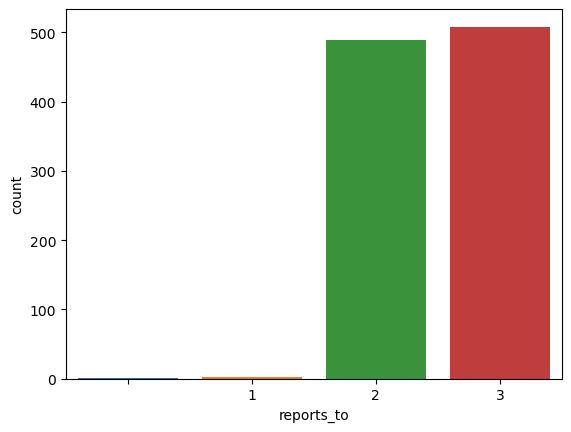

In [119]:
sns.barplot(data=count_df, x='reports_to', y='count')

In [120]:
df[['jobRole', 'location']]

,jobRole,location
0,CEO,Hartford
1,Manager,Hartford
2,Manager,Hartford
3,Customer Service,Hartford
4,Tech,St. Paul
...,...,...
995,HR,New York
996,Tech,St. Paul
997,Sales,West Bridgewater
998,Sales,New York


In [121]:
# Training Model
X = df[['jobRole', 'location']]
y = df['salary']
X_encoded = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

X_test

,jobRole_CEO,jobRole_Customer Service,jobRole_HR,jobRole_Manager,jobRole_Sales,jobRole_Tech,location_Hartford,location_New York,location_St. Paul,location_West Bridgewater
521,0,1,0,0,0,0,1,0,0,0
737,0,0,0,0,0,1,0,1,0,0
740,0,0,1,0,0,0,0,0,0,1
660,0,0,0,0,1,0,0,0,1,0
411,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
408,0,0,1,0,0,0,0,1,0,0
332,0,0,1,0,0,0,1,0,0,0
208,0,0,0,0,1,0,0,0,0,1
613,0,0,0,0,1,0,1,0,0,0


In [122]:
# Predictions and accuracy
y_pred = model.predict(X_test)
score = r2_score(y_test, y_pred)

print(f"The accuracy of our model is {(round(score, 2) *100)}%")
# y_pred

The accuracy of our model is 94.0%


In [123]:
# Example prediction
example_data = {
    'jobRole_CEO': [0],
    'jobRole_Customer Service': [0],
    'jobRole_HR': [0],
    'jobRole_Manager': [0],
    'jobRole_Sales': [0],
    'jobRole_Tech': [1],
    'location_Hartford': [1],
    'location_New York': [0],
    'location_St. Paul': [0],
    'location_West Bridgewater': [0],
}
prediction_input_df = pd.DataFrame(example_data)

# TODO!!! this v has to look exactly like a row from X_test
prediction_input_df

,jobRole_CEO,jobRole_Customer Service,jobRole_HR,jobRole_Manager,jobRole_Sales,jobRole_Tech,location_Hartford,location_New York,location_St. Paul,location_West Bridgewater
0,0,0,0,0,0,1,1,0,0,0


In [124]:
features = prediction_input_df.to_numpy()

prediction = model.predict(features)
prediction

c:\Users\wasadmin\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([201344.])

In [125]:
filename = 'salary_prediction_model.pkl'
#.pkl is common name for pickle file

with open(filename, 'wb') as file:
         pickle.dump(model, file)